# Exploratory Data Analysis (EDA)

## Objective
The purpose of this notebook is to explore and visualize the dataset to identify patterns, relationships, and potential issues that may influence the outcome of the analysis. By conducting a thorough EDA, we aim to uncover insights that can guide the next steps in our project.

## Key Steps
1. **Descriptive Statistics**
   - Summarize the dataset with measures such as mean, median, and standard deviation.
   - Identify potential anomalies or unexpected distributions.

2. **Variable Distributions**
   - Visualize the distribution of numerical variables to detect skewness, multimodality, and ranges.
   - Use boxplots to highlight potential outliers.

3. **Relationships Between Variables**
   - Examine correlations between numerical variables.
   - Use scatterplots and heatmaps to identify trends and relationships.

4. **Group Comparisons**
   - Compare distributions of key variables across groups, such as wine quality levels.

5. **Insights**
   - Highlight the key takeaways from the exploratory analysis.
   - Document questions or hypotheses for statistical analysis or machine learning.

## Deliverables
- Well-documented visualizations and observations.
- A summary of findings that will influence the next stages of the project.


# 1. Descriptive Statistics

### 1.1 Load the cleaned dataset

In [4]:
import pandas as pd

# Load the cleaned data
df = pd.read_csv('../data/cleaned_dataset.csv')

# Display the first few rows to understand the structure of the data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


### 1.2 Descriptive Statistics

In [6]:
# Generate summary statistics for numerical columns
print("Numerical Columns Descriptive Statistics:")
display(df.describe().T)

# Generate a summary for categorical columns, if any
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_columns) > 0:
    print("\nCategorical Columns Summary:")
    for col in categorical_columns:
        print(f"Column: {col}")
        print(df[col].value_counts(), "\n")

Numerical Columns Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


### 1.3 Initial Observations
#### Observations:
1. `residual sugar`, `total sulfur dioxide`, `chlorides`, and `sulphates` show significantly high maximum values compared to their 75th percentiles, suggesting the presence of outliers.
2. The `quality` column indicates that most wines fall within the average quality range (5-6), with few high-quality samples (7 or above).
3. `density` has an extremely narrow range, which might require normalization for proper analysis.
4. Variables like `alcohol` exhibit larger variation, potentially making them more influential in the analysis.

# 2. Variable Distributions

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 Visualize distributions using histograms

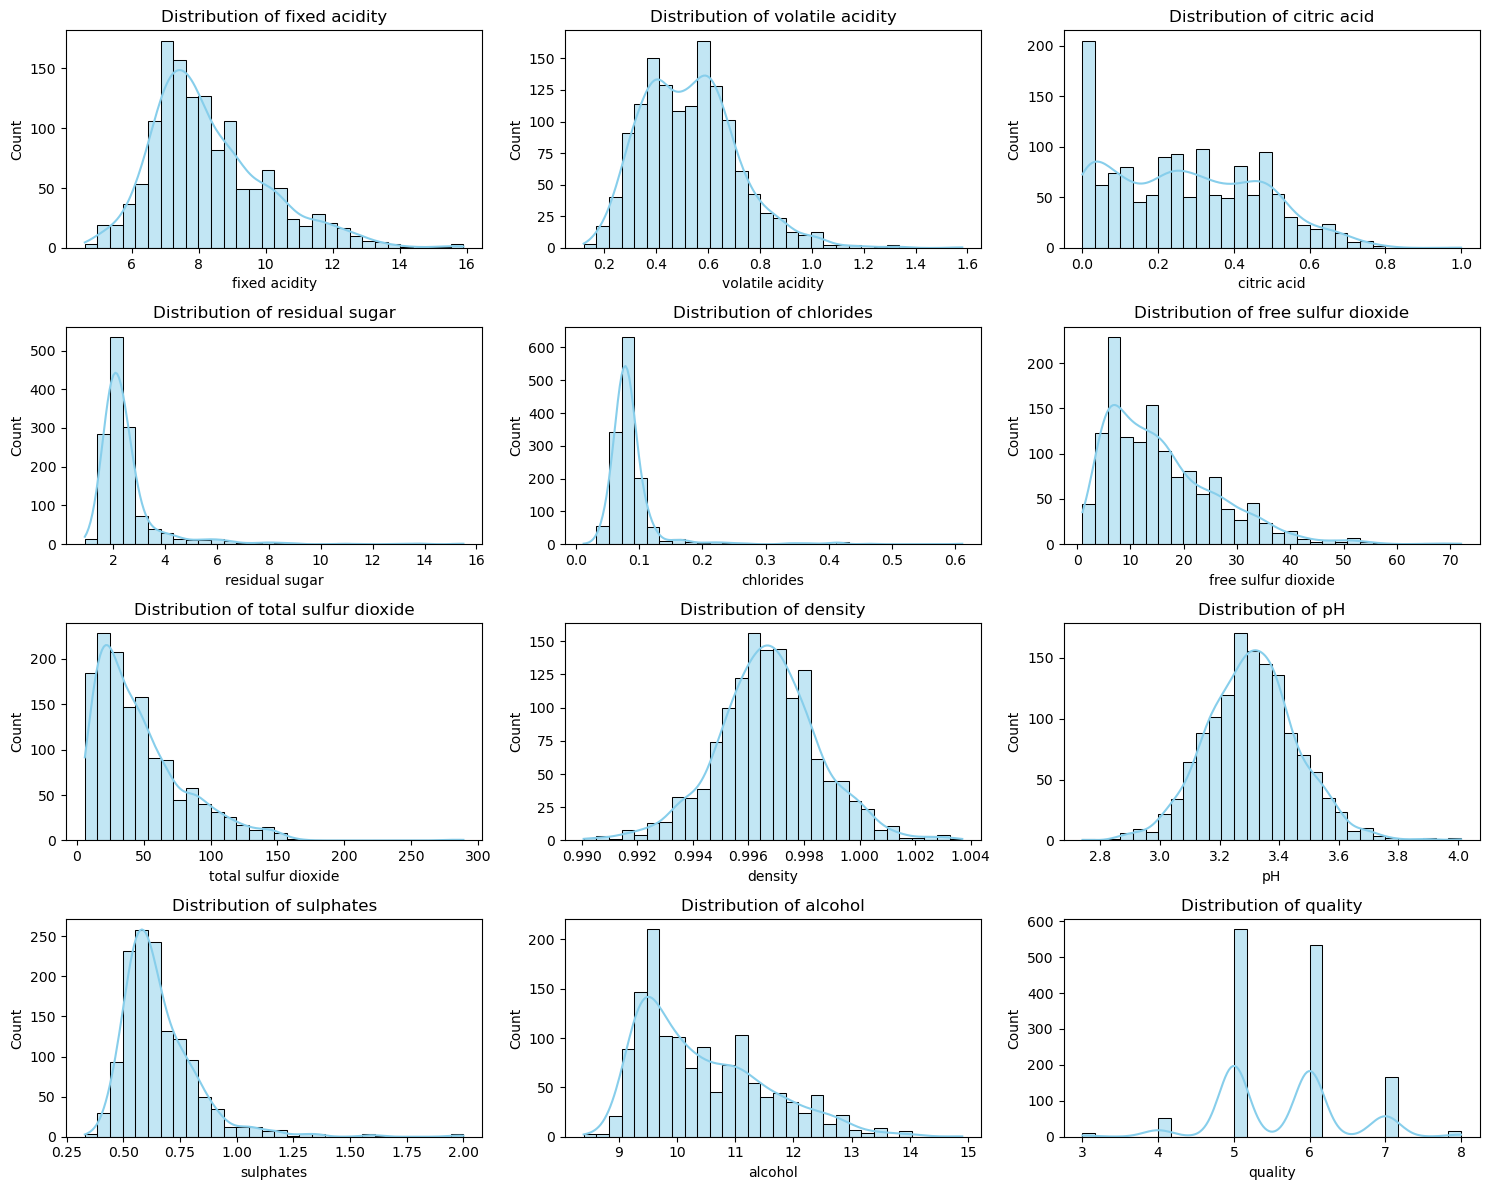

In [11]:
numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### 2.2 Correlation Analysis

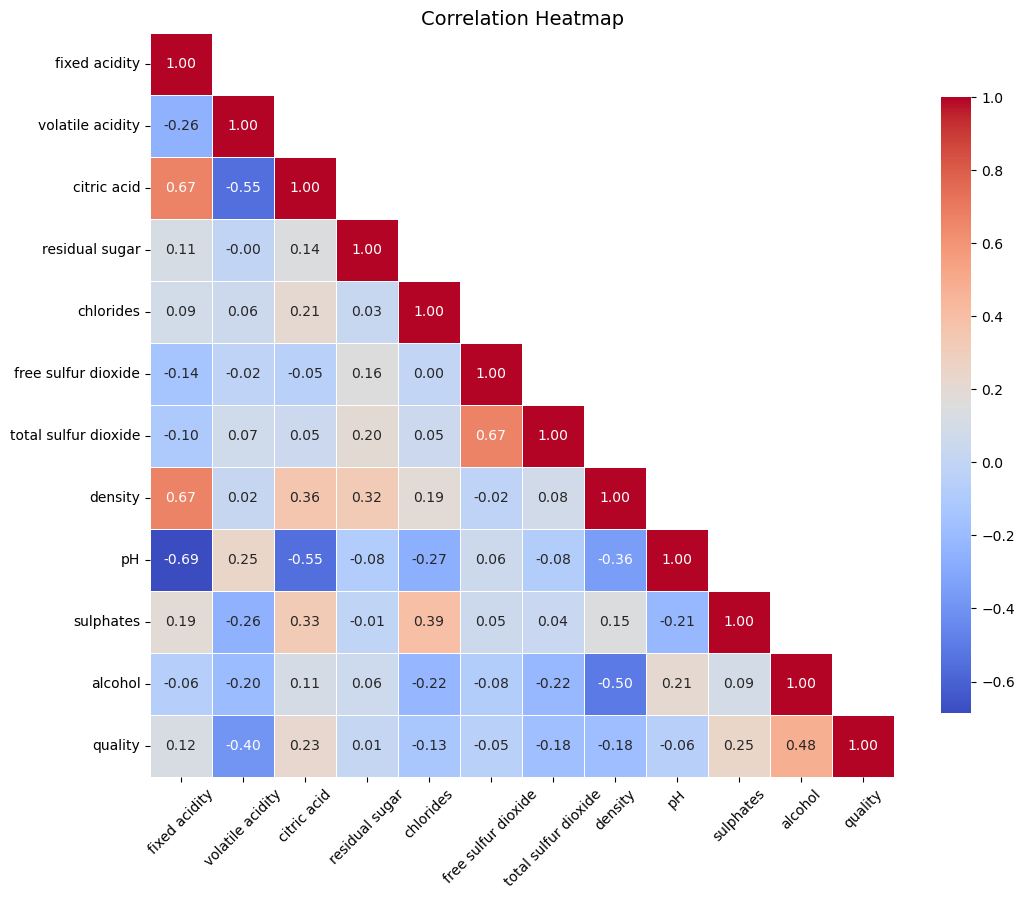

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
correlation_matrix = df.corr()

# Mask for the upper triangle (excluding the diagonal)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Set up the figure for the heatmap
plt.figure(figsize=(12, 10))

# Generate the heatmap with the mask
sns.heatmap(
    correlation_matrix,
    mask=mask,             # Apply the mask to hide upper triangle (excluding diagonal)
    annot=True,            # Show correlation values
    cmap='coolwarm',       # Color map
    fmt=".2f",             # Format for correlation values
    linewidths=0.5,        # Add space between cells
    square=True,           # Make cells square
    cbar_kws={"shrink": 0.8}  # Adjust color bar size
)

# Rotate the x and y labels for better readability
plt.xticks(rotation=45, ha='center', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title("Correlation Heatmap", fontsize=14)
plt.show()


#### 2.2.1 Most correlated variables with quality

In [24]:
# Calculate correlations with the 'quality' column
correlations = df.corr()['quality'].sort_values(ascending=False)

# Display the most positively and negatively correlated variables
print("Top correlated variables with 'quality':\n")
print(correlations)

Top correlated variables with 'quality':

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64


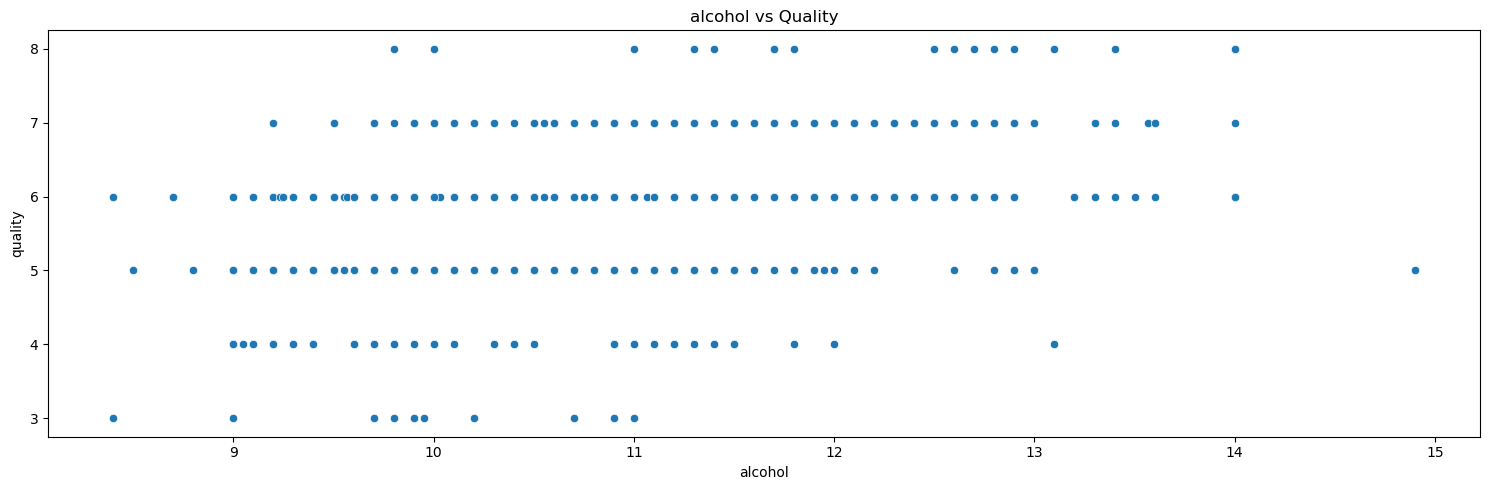

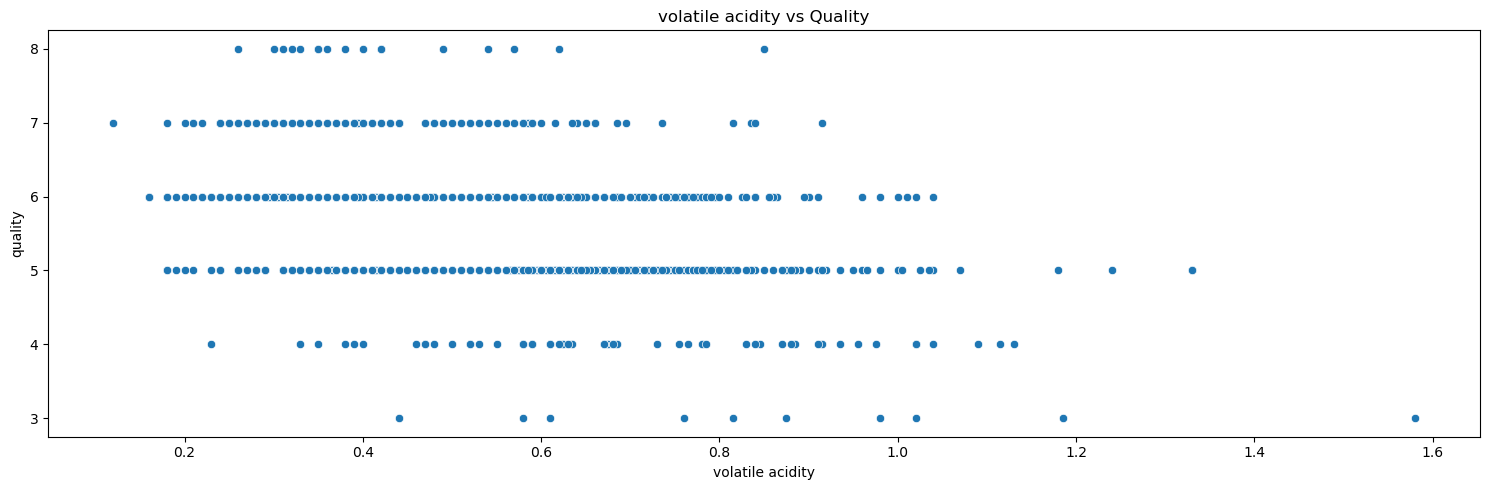

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify variables with correlations > 0.30 (positive) and < -0.30 (negative)
positive_corr = correlations[correlations >= 0.30].index.tolist()
negative_corr = correlations[correlations <= -0.30].index.tolist()

# Remove 'quality' from the lists (since it will always have correlation 1.0 with itself)
if 'quality' in positive_corr:
    positive_corr.remove('quality')
if 'quality' in negative_corr:
    negative_corr.remove('quality')

# Plot scatter plots for positively correlated variables
plt.figure(figsize=(15, 5))
for i, var in enumerate(positive_corr, 1):
    plt.subplot(1, len(positive_corr), i)
    sns.scatterplot(x=df[var], y=df['quality'])
    plt.title(f'{var} vs Quality')
plt.tight_layout()
plt.show()

# Plot scatter plots for negatively correlated variables
plt.figure(figsize=(15, 5))
for i, var in enumerate(negative_corr, 1):
    plt.subplot(1, len(negative_corr), i)
    sns.scatterplot(x=df[var], y=df['quality'])
    plt.title(f'{var} vs Quality')
plt.tight_layout()
plt.show()
